# ラプラス正則化による半教師あり学習

In [1]:
import sys,os
sys.path.append(os.pardir)
from tools.models.classifiers.laplacian_regularization_classifier import LaplacianRegularizationClassifier
from tools.models.classifiers.gaussian_kernel_ls_classifier import GaussianKernelLSBinaryClassifier
from tools.utils.plot.semi_supervised_plot import SemiSupervisedPlotter

In [2]:
import numpy as np

In [3]:
def generate(n,seed=None):
    pos_n=n//2
    neg_n=n-pos_n
    np.random.seed(seed)
    pos = np.linspace(0, np.pi,pos_n)
    x_1 = -10*np.cos(pos)+5 + np.random.randn(pos_n)
    x_2 = -10*np.sin(pos) +np.random.randn(pos_n)
    pos_x=(-10*np.array([x_1,x_2])).T
    neg = np.linspace(0, np.pi,neg_n)
    x_1 = -10*np.cos(neg)-5 +np.random.randn(neg_n)
    x_2 = 10* np.sin(neg) +np.random.randn(neg_n)
    neg_x=(-10*np.array([x_1,x_2])).T
    X=np.concatenate([pos_x,neg_x])
    y=np.array([None]*n)
    y[pos_n]=-1
    y[pos_n-1]=1
    return X,y

In [4]:
N=200
SEED=0

In [5]:
X,y=generate(N,SEED)

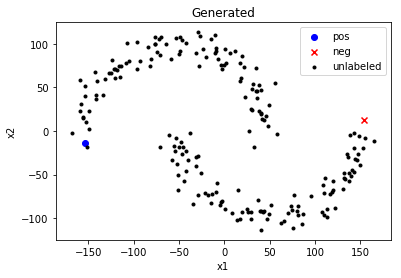

In [6]:
plotter=SemiSupervisedPlotter()
plotter.plot(X,y,"Generated")

In [7]:
semi_supervised_model=LaplacianRegularizationClassifier(lam=1,nu=1,h_w=10,h_m=10)
supervised_model=GaussianKernelLSBinaryClassifier(h=10,c=1)

In [8]:
semi_supervised_model.fit(X,y)

In [9]:
supervised_model.fit(X[(y==1)|(y==-1)],(y[(y==1)|(y==-1)]).astype(float))

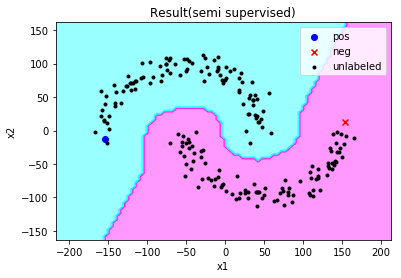

In [10]:
plotter.plot(X,y,"Result(semi supervised)",semi_supervised_model,resolution=5)

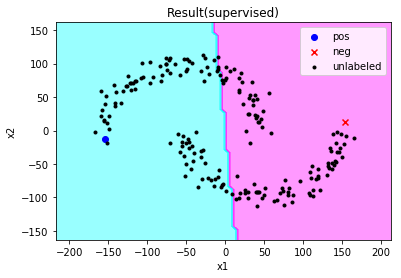

In [11]:
plotter.plot(X,y,"Result(supervised)",supervised_model,resolution=5)